In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import time
import folium
import os
import sys
import abstract_flows.arrow as arrow
import abstract_flows.grid as grid
import abstract_flows.flows as flows
from load_data import load_data

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

Datos sintéticos

In [2]:
bf =[]

for i in range(1, 4):
    f = np.load(f'synthetic_data/f{i}.npy')
    bf.append(f)

In [3]:
for f in bf:
    print('Flow')
    print(f)

Flow
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
Flow
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
Flow
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [4]:
laplacian = np.load('synthetic_data/laplacian.npy')
print('Laplacian')
print(laplacian)

Laplacian
[[ 1.         -0.5         0.         -0.40824829]
 [-0.5         1.          0.         -0.40824829]
 [ 0.          0.          1.         -0.57735027]
 [-0.40824829 -0.40824829 -0.57735027  1.        ]]


In [5]:
fs = np.load('synthetic_data/flows.npy')
print('Flows')
print(fs[0:2])

Flows
[[[1.  0.  0.  0. ]
  [0.  1.  0.  0. ]
  [0.  0.  0.  1. ]
  [0.  0.  1.  0. ]]

 [[0.9 0.  0.  0. ]
  [0.1 1.  0.  0. ]
  [0.  0.  0.  1. ]
  [0.  0.  1.  0. ]]]


Resultados

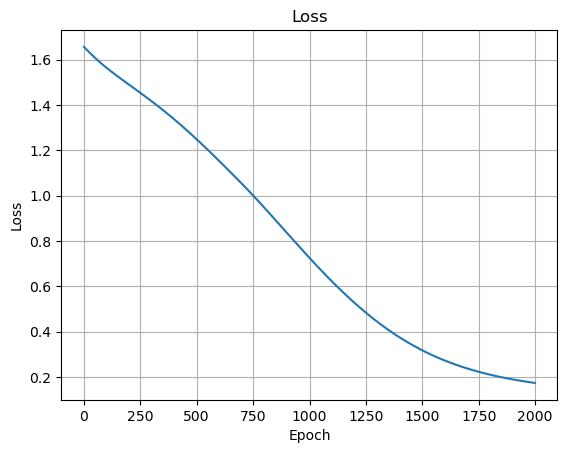

In [62]:
loss = np.load('results_little_experiment/loss.npy')
plt.plot(loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

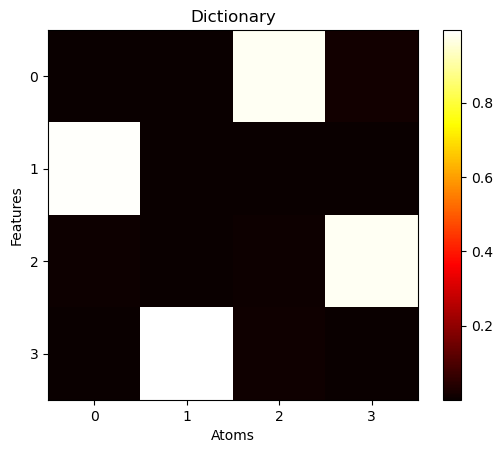

[[1.1265761e-03 9.9447102e-04 9.7984594e-01 1.5784163e-02]
 [9.9054646e-01 3.6458604e-03 4.3790797e-03 7.0201757e-04]
 [6.6615283e-03 5.3326384e-04 6.2328991e-03 9.8084831e-01]
 [1.6654527e-03 9.9482638e-01 9.5421076e-03 2.6655558e-03]]


array([1., 1., 1., 1.], dtype=float32)

In [63]:
D = np.load('results_little_experiment/dictionary.npy')
plt.imshow(D, cmap='hot', interpolation='nearest')
plt.title('Dictionary')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, D.shape[1], 1))
plt.yticks(np.arange(0, D.shape[0], 1))
plt.colorbar()
plt.show()
print(D)
D.sum(axis=0)

In [64]:
weights = np.load('results_little_experiment/weights.npy')
print(weights[1])
weights[1].sum(axis=1)

[[1.9754153e-02 9.4923025e-01 8.0446672e-04 7.1859844e-02]
 [1.1920607e-02 1.3701007e-02 9.9697000e-01 1.6600000e-02]
 [8.7426960e-01 1.4248492e-02 1.9163812e-03 3.0514179e-02]
 [9.4055645e-02 2.2820203e-02 3.0913166e-04 8.8102597e-01]]


array([1.0416487 , 1.0391916 , 0.9209487 , 0.99821097], dtype=float32)

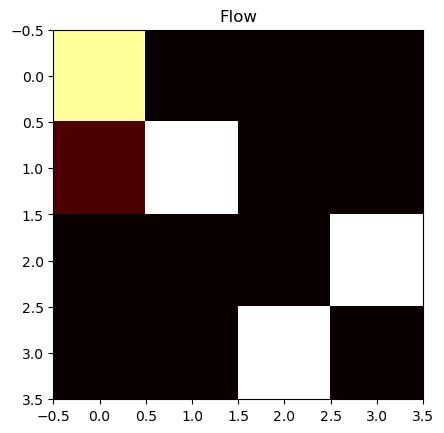

array([[0.9, 0. , 0. , 0. ],
       [0.1, 1. , 0. , 0. ],
       [0. , 0. , 0. , 1. ],
       [0. , 0. , 1. , 0. ]])

In [65]:
plt.imshow(fs[1], cmap='hot', interpolation='nearest')
plt.title('Flow')
plt.show()
fs[1]

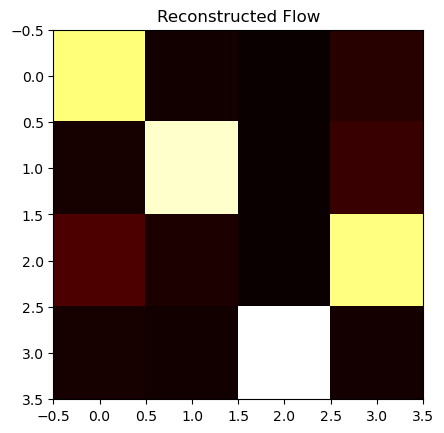

[[8.5816818e-01 1.5404530e-02 2.8750019e-03 4.3902915e-02]
 [2.3505392e-02 9.4038504e-01 4.4402843e-03 7.1993157e-02]
 [9.7841501e-02 2.8802598e-02 8.5216289e-04 8.6483055e-01]
 [2.0484919e-02 1.5407810e-02 9.9183249e-01 1.9273389e-02]]


In [66]:
fs_reconstructed = D@weights[1]
plt.imshow(fs_reconstructed, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow')
plt.show()
print(fs_reconstructed)